In [1]:
import pandas as pd
import numpy as np
import mnist
import scipy.misc
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

# imports the mnist data and assigns it
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Concatenates the images and labels in preparation for k-folds application.
# Although we were given a training and testing set, we combined the testing and training sets into a single set of images 
# so we can aply K-folds to the entire dataset
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))

# Flattening out the "images" array by concatenating the rows of the actual 
# image array to be accesible to k-means 
images = images.reshape(len(images), -1)

# normalizing the dataset
images = images/ 255

# Defining the amount of folds as 5. This is our method of cross-validation
kfold = KFold(5)

# Define X clusters
clust_num = 10
# Defining how many clusters for k-means algorithm
kmeans = KMeans(clust_num)
# Defining our list to keep track of what the clusters are predicted as
ref_dict = dict()
# Keeping track of the average error of each model for a graph that finds
# The optimal K later
error_amount = list([])

In [2]:
%%time
# Amount of time taken

clust_num = 10
ref_dict = dict()
error_temp = list([])

#Defining a list which will hold the models that have 10 clusters
model_clust10_list = list([])

#For loop looping through each k-fold (each with a unique training set and testing set)
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    #Creating our ith model
    temp_model = KMeans(clust_num)
    # Fitting and transforming based off of the unique train set
    temp_model.fit_transform(images[train_index])
    #Looping through each cluster in the K-means model and finding the label of the image most associated with that cluster
    for cluster in range(clust_num):
        #Creating temporary array
        temp_list = list([])
        #Looping through the training images in each custer and labeling the clusters based on the majority image labels
        for j, (label_index) in enumerate(train_index):
            # If the custer label found is the same as the cluster label given to the image then append that image's label 
            # to the temporarylist
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        #Creating a dictionary with key value pairs asociated with each cluster's most found image label
        ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    #Make predictions based on the test set
    predictions = temp_model.predict(images[test_index])
    #Defining A list to contain the true labels
    true_predictions = list([])
    correct = 0
    #Looping through the predictions, finding the true labels, and then determining if the label predicted is correct
    for i, (prediction) in enumerate(predictions):
        #Set predicted label to most found label in predicted cluster
        predicted_label = ref_dict[prediction]
        #Asigning the true label
        true_label = labels[test_index[i]]
        # Determine if correct
        if true_label == predicted_label:
            correct = correct + 1
    #Appending the model created to our list for later reference
    model_clust10_list.append(temp_model)
    # Finding and keeping the error of each K-fold model
    error_temp.append(1 - (correct/len(predictions)))
#Find and append the average error of the 10-cluster models
error_amount.append(sum(error_temp)/5)

C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

CPU times: total: 14min 52s
Wall time: 3min 41s


In [3]:
%%time

clust_num = 20
ref_dict = dict()
error_temp = list([])

model_clust20_list = list([])
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = KMeans(clust_num)
    temp_model.fit_transform(images[train_index])
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    model_clust20_list.append(temp_model)
    error_temp.append(1 - (correct/len(predictions)))
error_amount.append(sum(error_temp)/5)

C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

CPU times: total: 20min 23s
Wall time: 5min 3s


In [4]:
%%time

clust_num = 40
ref_dict = dict()
error_temp = list([])

model_clust40_list = list([])
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = KMeans(clust_num)
    temp_model.fit_transform(images[train_index])
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    model_clust40_list.append(temp_model)
    error_temp.append(1 - (correct/len(predictions)))
error_amount.append(sum(error_temp)/5)

C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

CPU times: total: 35min 30s
Wall time: 8min 54s


In [5]:
%%time

clust_num = 80
ref_dict = dict()
error_temp = list([])

model_clust80_list = list([])
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = KMeans(clust_num)
    temp_model.fit_transform(images[train_index])
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    model_clust80_list.append(temp_model)
    error_temp.append(1 - (correct/len(predictions)))
error_amount.append(sum(error_temp)/5)

C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

CPU times: total: 59min 30s
Wall time: 15min


In [6]:
%%time

clust_num = 160
ref_dict = dict()
error_temp = list([])

model_clust160_list = list([])
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = KMeans(clust_num)
    temp_model.fit_transform(images[train_index])
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    model_clust160_list.append(temp_model)
    error_temp.append(1 - (correct/len(predictions)))
error_amount.append(sum(error_temp)/5)

C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

CPU times: total: 1h 34min 56s
Wall time: 24min


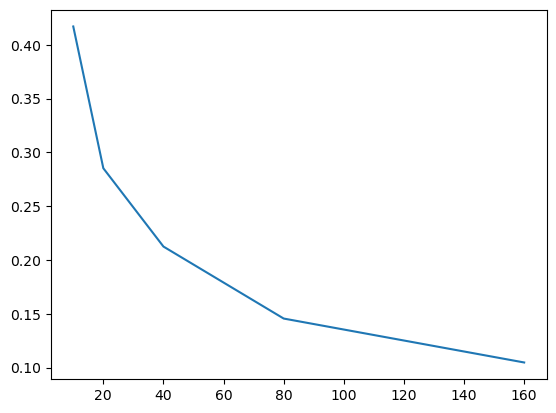

In [7]:
import matplotlib.pyplot as plt

cluster_number_array = [10, 20, 40, 80, 160]
plt.plot(cluster_number_array, error_amount)
plt.show()

In [8]:
#Code to identify the predictive accuracy of the 5 models
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = model_clust10_list[i]
    #Once more creating reference dictionary for testing
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        if len(temp_list) > 0:
            ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    #Calculating test accurracy
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    print((correct/len(predictions)))


0.5794285714285714
0.5845714285714285
0.5781428571428572
0.5822142857142857
0.5900714285714286


In [9]:
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = model_clust20_list[i]
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        if len(temp_list) > 0:
            ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    print((correct/len(predictions)))

0.7340714285714286
0.7071428571428572
0.7069285714285715
0.7053571428571429
0.72


In [10]:
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = model_clust40_list[i]
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        if len(temp_list) > 0:
            ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    print((correct/len(predictions)))

0.7806428571428572
0.7718571428571429
0.7716428571428572
0.7974285714285714
0.816


In [11]:
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = model_clust80_list[i]
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        if len(temp_list) > 0:
            ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    print((correct/len(predictions)))

0.8596428571428572
0.8575
0.8446428571428571
0.8457857142857143
0.8646428571428572


In [12]:
for i, (train_index, test_index) in enumerate(kfold.split(images)):
    temp_model = model_clust160_list[i]
    for cluster in range(clust_num):
        temp_list = list([])
        for j, (label_index) in enumerate(train_index):
            if temp_model.labels_[j] == cluster:
                temp_list.append(labels[label_index])
        if len(temp_list) > 0:
            ref_dict[cluster] = pd.Series(temp_list).value_counts().index[0]
    predictions = temp_model.predict(images[test_index])
    true_predictions = list([])
    correct = 0
    for i, (prediction) in enumerate(predictions):
        predicted_label = ref_dict[prediction]
        true_label = labels[test_index[i]]
        if true_label == predicted_label:
            correct = correct + 1
    print((correct/len(predictions)))

0.9008571428571429
0.8867857142857143
0.8938571428571429
0.8913571428571428
0.9035714285714286
